In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse


In [3]:
!pip install statsmodels matplotlib seaborn pandas


<ipython-input-4-047cccf6885e>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  index = pd.date_range(start='1959Q1', periods=len(data), freq='Q')


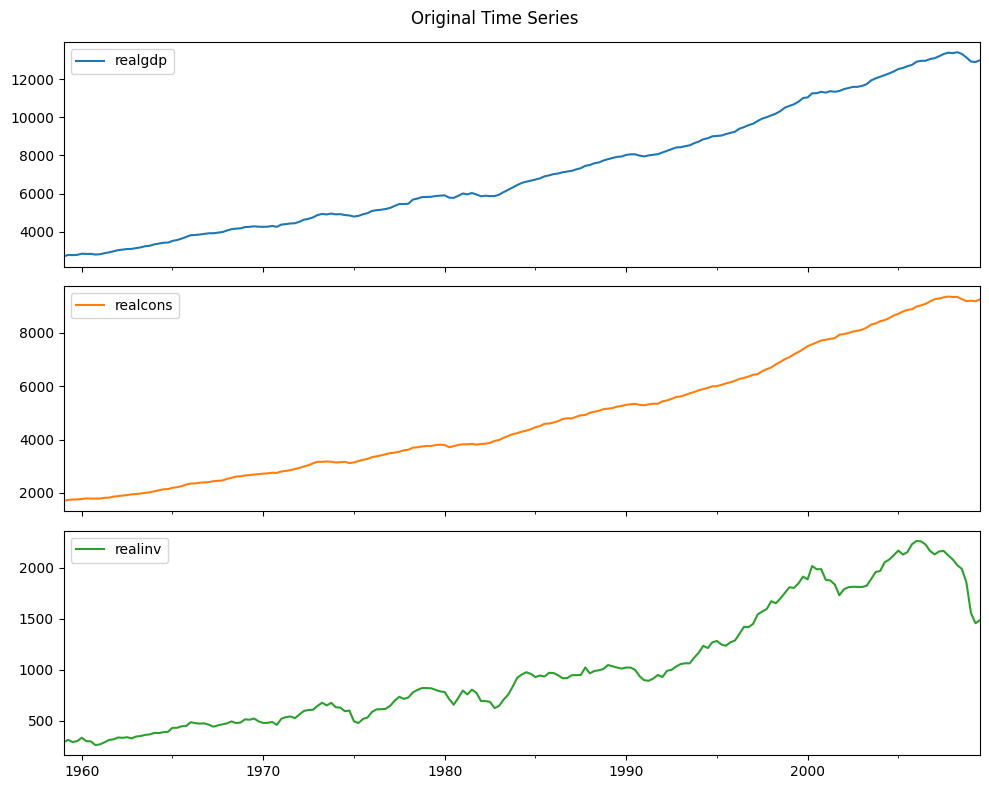


ADF Test Results:
realgdp: p-value = 0.9982455372335032 -> Non-stationary
realcons: p-value = 0.9976992503412904 -> Non-stationary
realinv: p-value = 0.6484956579101143 -> Non-stationary

ADF Test on Differenced Data:
realgdp: p-value = 3.327882187668224e-08 -> Stationary
realcons: p-value = 0.0006479282158627595 -> Stationary
realinv: p-value = 4.297932808177112e-06 -> Stationary


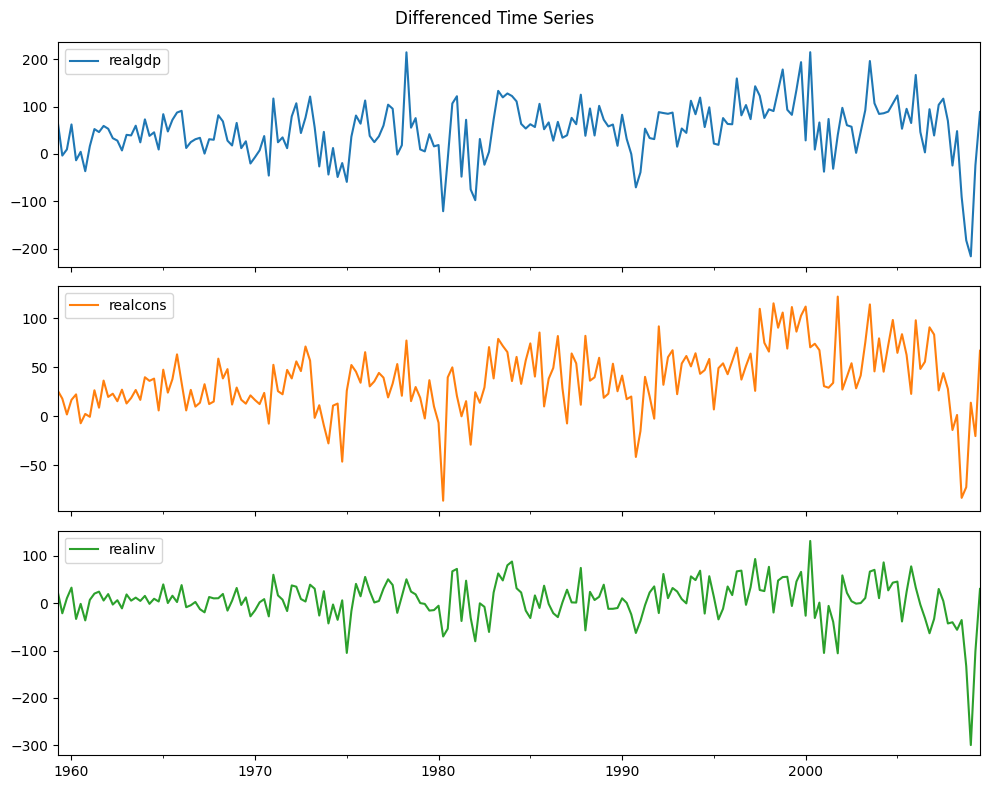

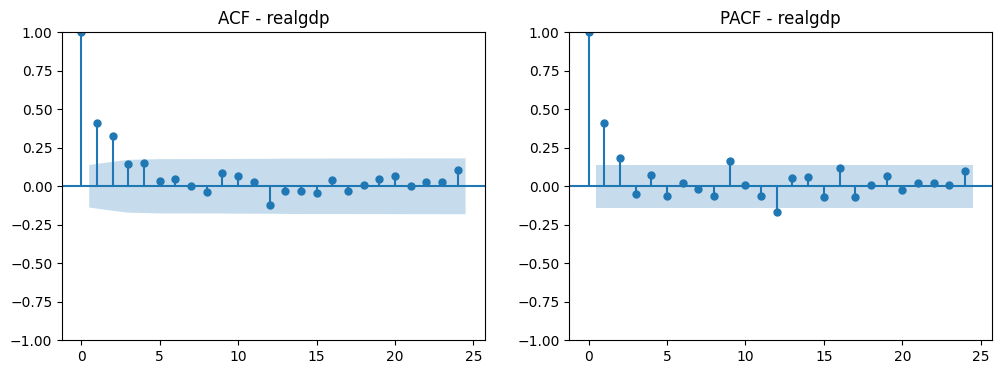

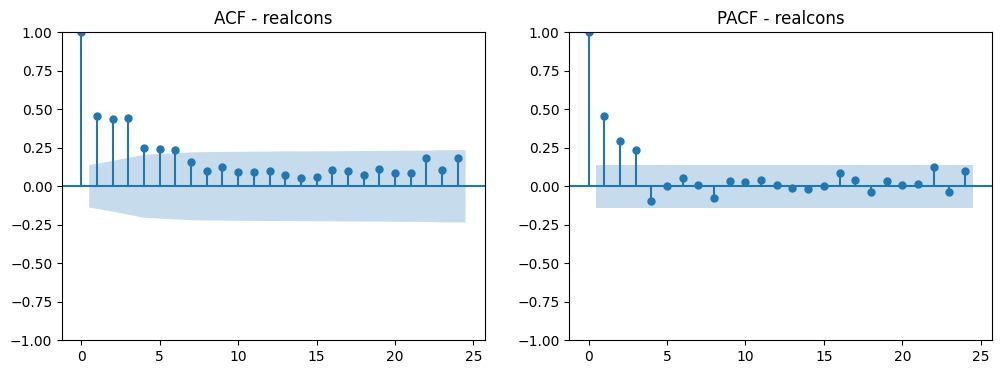

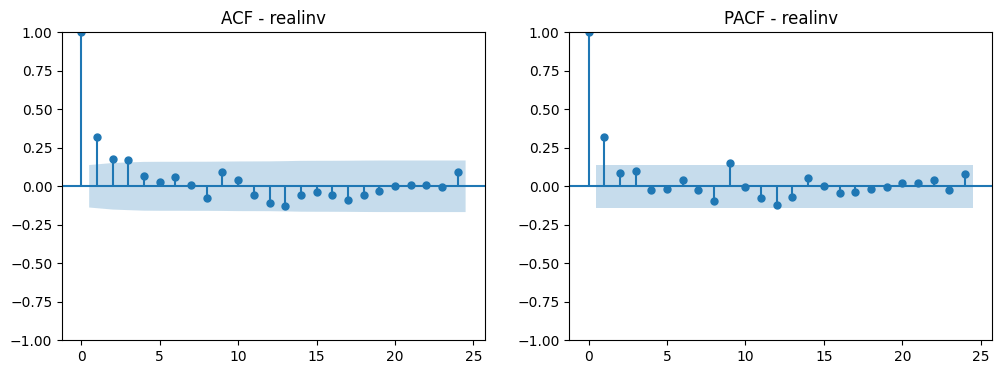


Lag Order Selection:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        21.03       21.08   1.358e+09       21.05
1        20.39      20.60*   7.159e+08       20.47
2        20.37       20.73   7.031e+08       20.52
3       20.26*       20.78  6.282e+08*      20.47*
4        20.30       20.97   6.544e+08       20.57
5        20.32       21.15   6.694e+08       20.66
6        20.34       21.32   6.801e+08       20.73
7        20.37       21.51   7.070e+08       20.84
8        20.39       21.68   7.180e+08       20.91
9        20.39       21.85   7.251e+08       20.98
10       20.44       22.05   7.639e+08       21.10
11       20.51       22.27   8.165e+08       21.22
12       20.52       22.44   8.326e+08       21.30
13       20.55       22.62   8.565e+08       21.39
14       20.57       22.80   8.834e+08       21.48
15       20.58       22.97   8.978e+08       21.55
---------

<ipython-input-4-047cccf6885e>:67: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_diff = pd.DataFrame(forecast_diff, index=pd.date_range(start=df_diff.index[-1] + pd.offsets.QuarterEnd(), periods=10, freq='Q'), columns=df.columns)


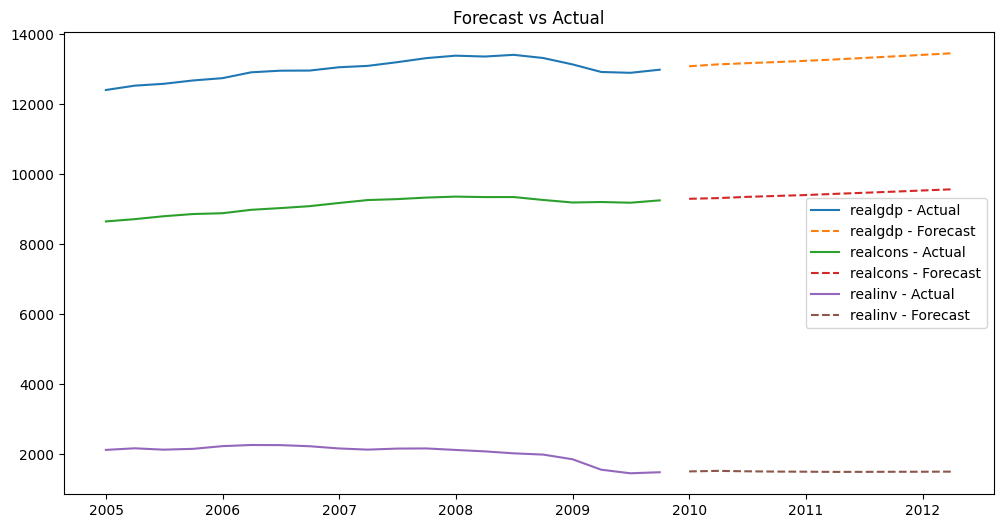

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import VAR
from statsmodels.datasets import macrodata
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load macroeconomic dataset
data = macrodata.load_pandas().data

# Convert year and quarter to datetime
index = pd.date_range(start='1959Q1', periods=len(data), freq='Q')
df = data[['realgdp', 'realcons', 'realinv']]
df.index = index

# Visualize original data
df.plot(subplots=True, figsize=(10, 8), title="Original Time Series")
plt.tight_layout()
plt.show()

# ADF Test for stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'{series.name}: p-value = {result[1]} -> {"Stationary" if result[1] < 0.05 else "Non-stationary"}')

print("\nADF Test Results:")
for col in df.columns:
    adf_test(df[col])

# Differencing
df_diff = df.diff().dropna()

# Re-check stationarity
print("\nADF Test on Differenced Data:")
for col in df_diff.columns:
    adf_test(df_diff[col])

# Plot differenced data
df_diff.plot(subplots=True, figsize=(10, 8), title="Differenced Time Series")
plt.tight_layout()
plt.show()

# ACF/PACF plots
for col in df_diff.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df_diff[col], ax=ax[0], title=f"ACF - {col}")
    plot_pacf(df_diff[col], ax=ax[1], title=f"PACF - {col}")
    plt.show()

# Lag order selection
model = VAR(df_diff)
lag_order_results = model.select_order(maxlags=15)
print("\nLag Order Selection:")
print(lag_order_results.summary())

# Fit VAR Model
model_fitted = model.fit(lag_order_results.aic)
print(model_fitted.summary())

# Forecast next 10 steps
forecast_input = df_diff.values[-model_fitted.k_ar:]
forecast_diff = model_fitted.forecast(y=forecast_input, steps=10)

forecast_diff = pd.DataFrame(forecast_diff, index=pd.date_range(start=df_diff.index[-1] + pd.offsets.QuarterEnd(), periods=10, freq='Q'), columns=df.columns)

# Convert differenced forecast to original values
last_obs = df.iloc[-1]
forecast = forecast_diff.cumsum() + last_obs

# Plot forecast
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col].iloc[-20:], label=f'{col} - Actual')
    plt.plot(forecast[col], label=f'{col} - Forecast', linestyle='--')
plt.title("Forecast vs Actual")
plt.legend()
plt.show()


In [ ]:
import time

# ... (Your pytrends code)

# Add a delay after each request
time.sleep(5)  # Wait for 5 seconds (adjust as needed)

In [ ]:
from pytrends.request import TrendReq

# Create a TrendReq object with proxy settings
pytrends = TrendReq(hl='en-US', tz=360, proxies=['http://your_proxy_server:port', 'https://your_proxy_server:port'])

# ... (Rest of your pytrends code)

InvalidURL: Failed to parse: http://your_proxy_server:port